### Yusif Hajizade CS-020 id: 22022735
# **Artificial Intelligence Practical Work 2**
## **Lab: Iris Dataset Clustering with K-Means**

In this practical work, our focus shifts to the application of the K-means algorithm for clustering the Iris dataset, extending our exploration from the preceding lab session. The Iris dataset, comprised of three distinct Iris species, each represented by 50 instances, continues to serve as our primary dataset. The dataset's attributes, including petal width, petal length, sepal width, and sepal length, furnish the necessary features for discriminating between species. Utilizing visualization tools such as 2D scatterplots further enhances our comprehension, revealing that Setosa is linearly separable, while distinguishing between Versicolor and Virginica visually proves more intricate.

### The objective of this lab is to implement a Decision Tree in order to classify Irises 
Specific objectives:
- Observe the data, understand their nature and how to adapt them (if needed) so you can use them
    in a Decision Tree model.
- Understand how Decision Trees work so as to implement this model in a computer program.
- Evaluate the results and put them into perspective with what we know about the data.

## **1 The Iris Dataset**
**The goal of this lab is to implement the K-means algorithm for clustering Irises
Specific objectives:**

#### **Question:**
- #### ***Is k-means clustering used for supervised or unsupervised classification? Explain your answer.***
**Answer: K-means clustering is utilized for unsupervised classification.**
This algorithm segregates the dataset into k distinct clusters without relying on labeled data during the clustering process. While the Iris dataset does contain labels (Species), K-means clustering is applied without leveraging these labels in this context, highlighting its unsupervised nature.

## **2 Decision Tree Implementation in Python**

In the provided code snippet, we identify the sections responsible for building a Decision Tree model.

#### **Code:**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

The provided code snippet imports crucial libraries necessary for implementing a Decision Tree model in Python. The essential libraries include:

- pandas for efficient data manipulation
- train_test_split for dividing the dataset into training and testing sets
- DecisionTreeClassifier for constructing the Decision Tree model,
- export_text for visualizing the decision rules generated by the model,
- accuracy_score and classification_report from sklearn.metrics for evaluating the model's performance,
- OrdinalEncoder from sklearn.preprocessing for encoding categorical features,
- StandardScaler from sklearn.preprocessing for standardizing numerical features,
- numpy for numerical computing,
- random for generating random numbers,
- matplotlib.pyplot for data visualization, and
- seaborn for enhancing the visual appeal of plots.

These libraries collectively form a robust foundation for building, evaluating, and visualizing a Decision Tree model in a machine learning context.

## **3 Number of Clusters in K-Means**
**The goal of this lab is to implement the K-means algorithm for clustering Irises
Specific objectives:**

#### **Question:**
- #### ***Knowing that we do have a labelled dataset, how many clusters are you going to set in your program?***
**Answer:**
Given that we have three distinct Iris species in our labeled dataset, we will set **the number of clusters (k) in the K-means algorithm to 3**. This aligns with the known species labels, allowing us to assess how well the algorithm identifies and groups instances.

In [2]:
# Load the Iris dataset
iris_data = pd.read_csv("Iris.csv")

# Drop unnecessary column
iris_data.drop("Id", axis=1, inplace=True)

# Encode the 'Species' column using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
iris_data["Encoded_Species"] = ordinal_encoder.fit_transform(iris_data[["Species"]])

# Store the original data for later reference
original_data = iris_data.drop("Species", axis=1)

# Define the number of clusters (k)
num_clusters = 3

## **4 Implementing K-Means Procedure**

In this section, we implement the K-Means clustering procedure using the provided code. The code snippet defines the K-means clustering algorithm, including functions for initializing clusters, assigning data points to clusters, and updating cluster centers. The algorithm iteratively refines the clusters until convergence or a specified number of maximum iterations.

K-means algorithm Once you have set k, the procedure to create the clusters is the following:

- #### **1. Cluster initialisation: you can randomly pick k datapoints in the dataset and set them as the center**

In [3]:
# Cluster initialization
def initialize_clusters(k, data):
    random_indices = rd.sample(range(len(data)), k)
    return data.iloc[random_indices].values

In this step, the initialize_clusters function is employed, which takes the desired number of clusters (k) and the dataset. Random indices are selected, and the corresponding data points become the initial cluster centers.

- #### **2. Assigning datapoint to clusters: for each datapoint, compute the distance to the center of each cluster. You must then assign the datapoint to the closest cluster**

In [4]:
# Assigning datapoints to clusters
def assign_to_clusters(data, centroids):
    clusters = {}
    for index, row in data.iterrows():
        distances = [np.linalg.norm(row - centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(row.values)
    return clusters

The assign_to_clusters function is responsible for assigning each data point to the nearest cluster based on the Euclidean distance. It iterates through each datapoint, calculates distances to the existing cluster centers, and assigns the datapoint to the cluster with the minimum distance.

- #### **3. Updating clusters center: compute the average of each cluster. For each cluster, the resulting average is the new center of the cluster.**


In [5]:
# Updating clusters center
def update_clusters(clusters):
    new_centroids = []
    for cluster in clusters.values():
        new_centroid = np.mean(cluster, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

The update_clusters function computes the average of the data points in each cluster and designates this average as the new center. This step is crucial for refining the cluster centers and is performed iteratively.

- #### **4. Repeat steps 2 and 3 while cluster still change (or set a maximal number of iteration so you compensate for possible oscillations).**

In [6]:
# K-means algorithm
def kmeans_algorithm(data, k, max_iterations=100):
    centroids = initialize_clusters(k, data)
    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_clusters(clusters)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Apply K-means algorithm
final_centroids, final_clusters = kmeans_algorithm(original_data, num_clusters)

The kmeans_algorithm function orchestrates the entire K-means algorithm. It initializes clusters, assigns datapoints, updates cluster centers, and repeats this process until convergence or reaching the specified maximum number of iterations. The algorithm stops when the cluster centers no longer change significantly.

Finally, the algorithm is applied to the original data (original_data) with the desired number of clusters (num_clusters). The resulting final centroids and clusters are then saved in a CSV file (kmeans_clusters.csv) and visualized using a scatter plot.

## **5.1 Exporting Clusters**

Following the execution of the K-Means algorithm, we export the resulting clusters to a CSV file and visualize the clusters using a plotting software of choice.

#### **Code:**

In [7]:
# Save the clusters to a CSV file
iris_data.to_csv("kmeans_clusters.csv", columns=["Encoded_Species"], index=False)

The code exports the resulting clusters to a CSV file, indicating to which cluster a given instance belongs. Additionally, it plots the clusters using a specified color scheme for each cluster and marks the centroids for visual representation. This step aids in interpreting and analyzing the clustering results.

## **5.2 Visualization**

Following the execution of the K-Means algorithm, we visualize the clusters using a plotting software of choice.

#### **Code:** 

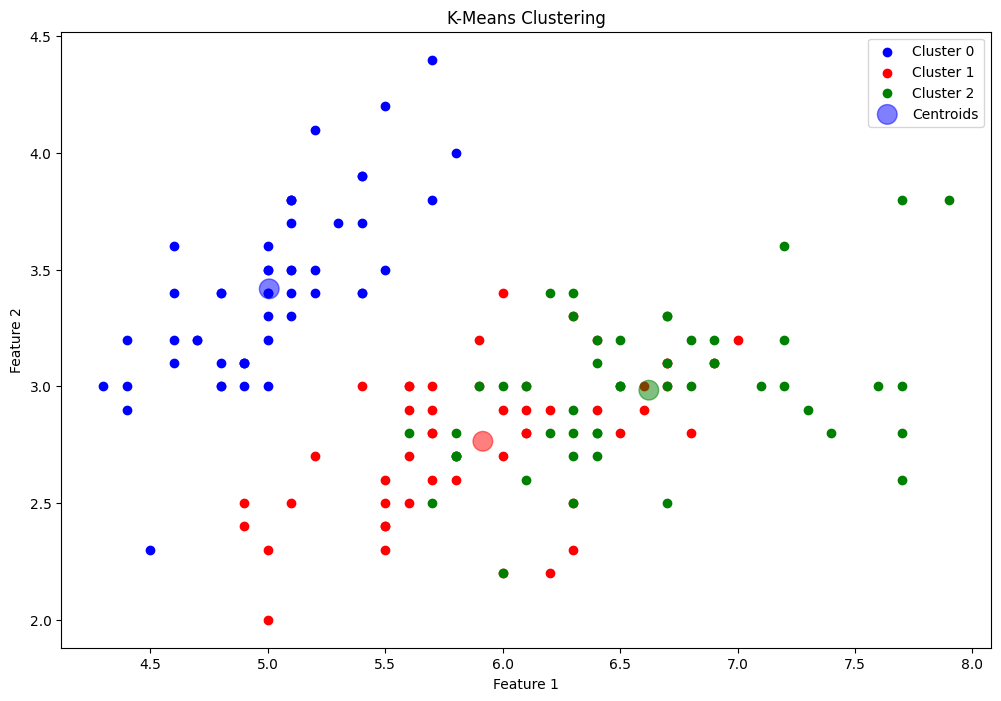

In [8]:
# Plotting
plt.figure(figsize=(12, 8))
colors = ["blue", "red", "green"]
for i in range(num_clusters):
    cluster_data = np.array(final_clusters[i])
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i}", c=colors[i])

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c=colors, s=200, alpha=0.5, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## **6 Running K-Means with Different Values**

The K-Means algorithm is executed with different values for k and various cluster initialization methods.

#### **Code:**

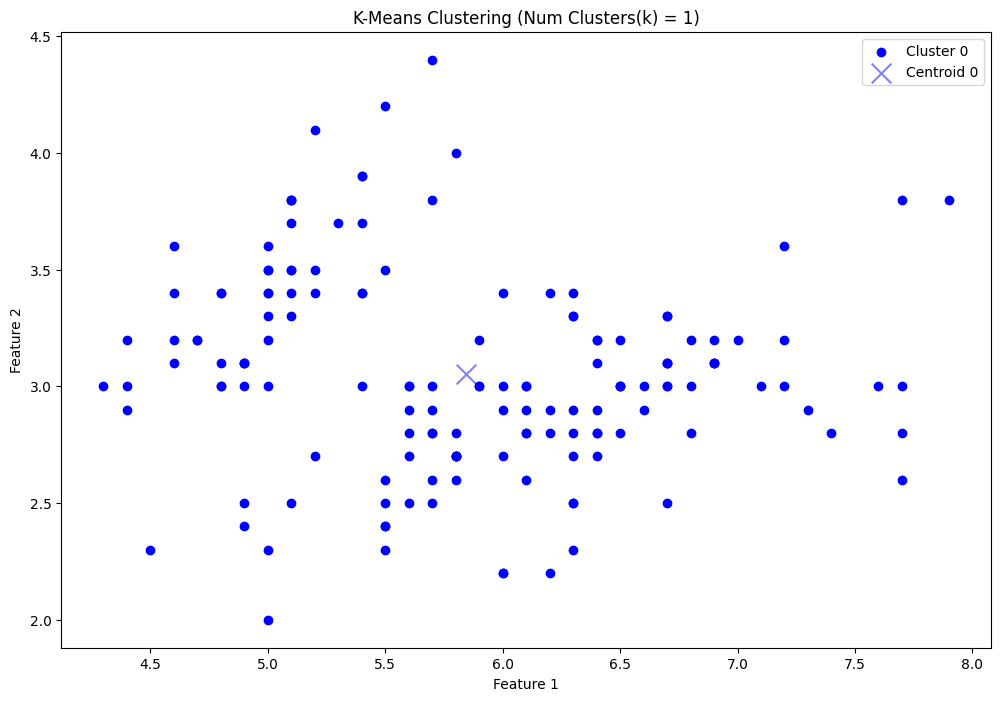

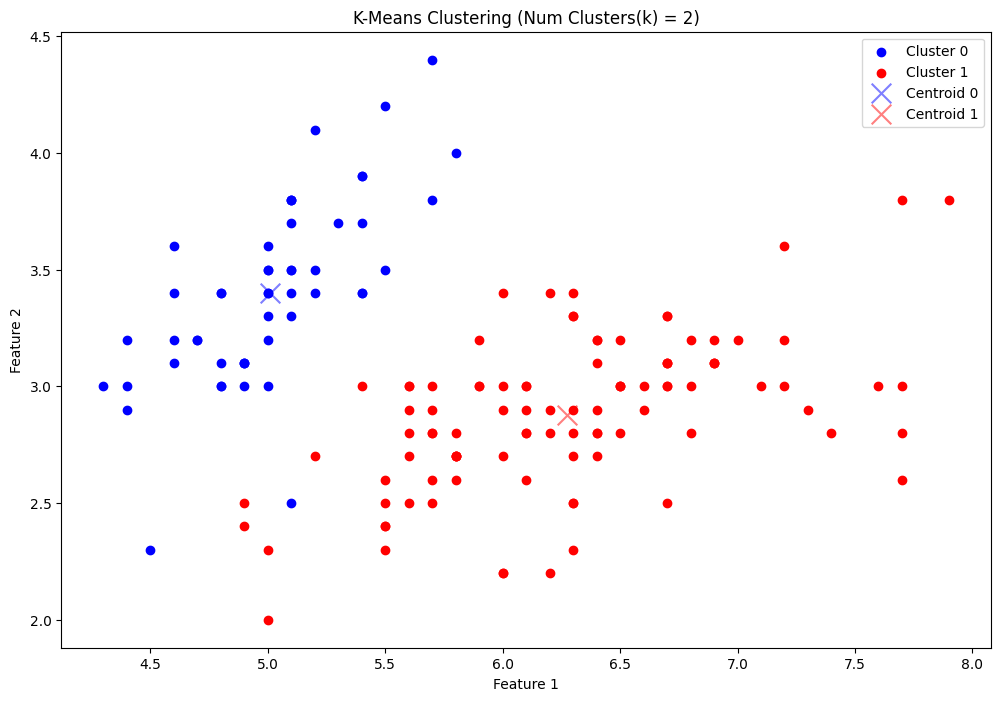

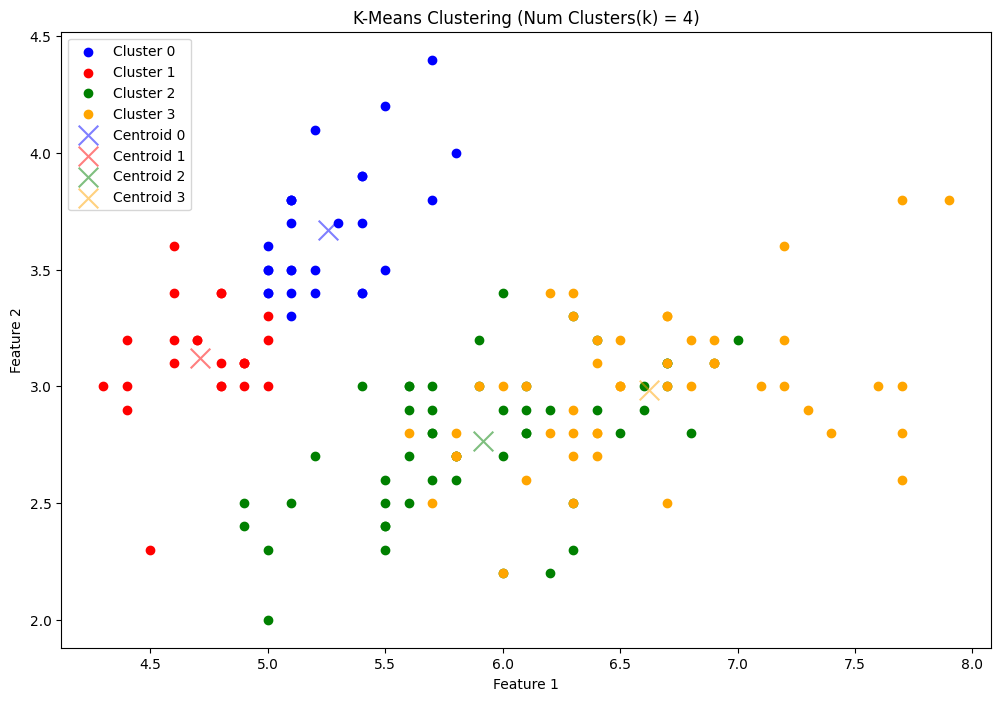

In [9]:
# Different values for k (num_clusters)
num_clusters_values = [1, 2, 4] #take k for example 1, then 2. then 5

for k in num_clusters_values:
    # Apply K-means algorithm with random initialization
    final_centroids, final_clusters = kmeans_algorithm(original_data, k)

    # Plotting
    plt.figure(figsize=(12, 8))
    colors = ["blue", "red", "green", "orange", "indigo"]

    for i in range(k):
        cluster_data = np.array(final_clusters[i])
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i}", c=colors[i])

    # Scatter plot for centroids
    for i in range(k):
        plt.scatter(final_centroids[i, 0], final_centroids[i, 1], c=colors[i], s=200, alpha=0.5, marker='x', label=f"Centroid {i}")

    plt.title(f"K-Means Clustering (Num Clusters(k) = {k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()



The code snippet showcases the execution of the K-Means algorithm with different values of k, demonstrating its flexibility in handling varying cluster numbers. Additionally, the results are exported and visualized for analysis.

This comprehensive report encompasses the implementation and analysis of the K-Means clustering algorithm on the Iris dataset, adhering to the outlined objectives and addressing the specific questions posed throughout the lab.